<a href="https://colab.research.google.com/github/albanesi/MNIST-First-Steps/blob/main/Kopie_von_1_MNIST_first_steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a neural network on MNIST with Keras&Tensorflow



In this Notebook you will start playing with the "Hello World" of Nueral Networks: The MNIST Dataset. And we will expand from there.

### 1. Classification of hand-written digits

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.__version__


'2.18.0'

In [3]:
mnist = tf.keras.datasets.mnist  # Zugriff auf den integrierten MNIST-Datensatz (handgeschriebene Ziffern von 0–9)
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()  # Lädt die Daten aufgeteilt in Trainings- und Testdaten
# X_train_full.shape  # (optional) zeigt die Dimensionen des Trainingsdaten-Arrays, z. B. (60000, 28, 28)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.  # Normalisiere Pixelwerte (0–255 → 0–1) und teile Trainingsdaten in Validierungs- und Trainingsset auf
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]  # Entsprechende Labels für Validierungs- und Trainingsset
X_test = X_test / 255.  # Auch die Testdaten werden normalisiert

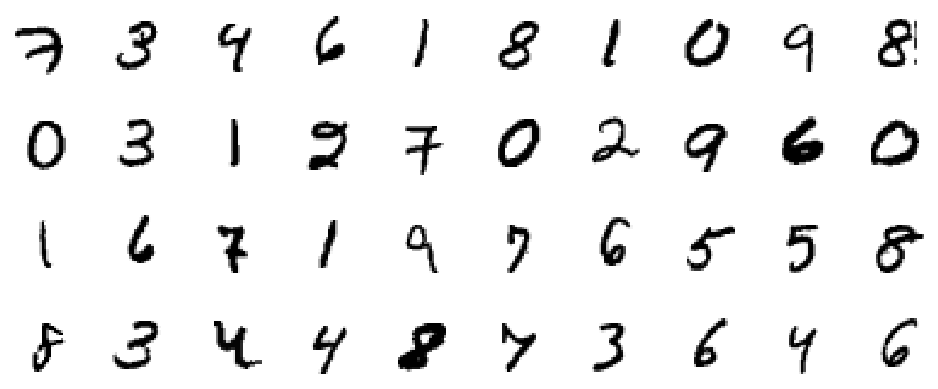

In [5]:
n_rows = 4  # Anzahl der Zeilen im Bildraster
n_cols = 10  # Anzahl der Spalten im Bildraster
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))  # Setzt die Größe der gesamten Abbildung in Zoll

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col  # Berechnet den Index für das Bild, das in dieser Position angezeigt werden soll
        plt.subplot(n_rows, n_cols, index + 1)  # Erzeugt ein Subplot-Feld an der richtigen Position
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")  # Zeigt das Bild in Schwarz-Weiss an
        plt.axis('off')  # Deaktiviert die Achsenanzeige

plt.subplots_adjust(wspace=0.2, hspace=0.5)  # Abstand zwischen den Subplots (horizontal und vertikal)
plt.show()  # Zeigt die gesamte Abbildung mit allen Subplots an


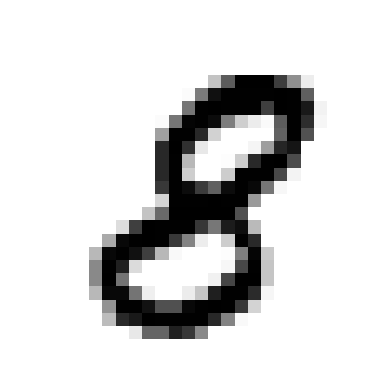

In [6]:
plt.imshow(X_train[5], cmap="binary")  # Zeigt das 6. Bild im Trainingsdatensatz in Schwarz-Weiss an
plt.axis('off')  # Entfernt Achsenbeschriftungen für ein sauberes Bild
plt.show()  # Zeigt die Grafik


In [7]:
y_train  # Gibt ein Array mit den Zielwerten (Labels) für alle Trainingsbilder zurück


array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

### Create and train the model
Implement an ANN with 2 Hidden Layers, the first with 128 neurons and "relu" activation functions. The second layers instead contains 64 neurons (also relu activation function).
Don't forget the output layer :)

Also, remember that due to the 2D structure of your input data you need to first flatten them. Use the following specific layer at the very beginning inside your Sequential Model:


tf.keras.layers.Flatten(input_shape=(28, 28))

Notabene: you don't need to provide the input_dim in the first Dense layer, if you start with a Flatten layer.

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Wandelt 28x28-Bild in 1D-Vektor um (784,)
    tf.keras.layers.Dense(128, activation='relu'),  # Erste versteckte Schicht mit 128 Neuronen und ReLU-Aktivierung
    tf.keras.layers.Dense(64, activation='relu'),   # Zweite versteckte Schicht mit 64 Neuronen und ReLU-Aktivierung
    tf.keras.layers.Dense(10, activation='softmax') # Ausgabeschicht mit 10 Neuronen (für die Ziffern 0–9), softmax liefert Wahrscheinlichkeiten
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Since my input are 2D images, I need first to "flatten" them into a 1-dimensional array. The number of input neurons will be the total number of pixels.

In [9]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Define now which cost function to minimize in the .compile method. Take "sgd" as optimizer and track the accuracy as metric.

For classification:Pay attention to the last layer if sigmoid or softmax is explicitly indicated, then from_logits = False

Notabene: Here a Sparse Categorical Crossentropy is used, becuase we are dealing with a multi-class classification If it would be a binary classification, then the loss function (i.e. the cost function) would have been Binary Crossentropy

For a full lists of cost functions available in tf.keras (both for Regression and Classification) https://www.tensorflow.org/api_docs/python/tf/keras/losses

In [10]:
# Modellkompilierung
model.compile(
    loss="sparse_categorical_crossentropy",  # Für Mehrklassenklassifikation mit Integer-Labels (0–9)
    optimizer="adam",                        # Effizienter Optimierer
    metrics=["accuracy"]                     # Genauigkeit als Metrik zur Bewertung
)

In [11]:
# TODO: Train the model using model.fit
# history = model.fit(...) # 1 epoch is a full pass over the whole training set, let's tray for 15 eopchs
# Modelltraining
history = model.fit(
    X_train, y_train,
    epochs=15,
    validation_data=(X_valid, y_valid)
)

Epoch 1/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8678 - loss: 0.4432 - val_accuracy: 0.9596 - val_loss: 0.1433
Epoch 2/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9658 - loss: 0.1126 - val_accuracy: 0.9760 - val_loss: 0.0897
Epoch 3/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9781 - loss: 0.0710 - val_accuracy: 0.9744 - val_loss: 0.0805
Epoch 4/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9847 - loss: 0.0505 - val_accuracy: 0.9766 - val_loss: 0.0837
Epoch 5/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9856 - loss: 0.0418 - val_accuracy: 0.9792 - val_loss: 0.0707
Epoch 6/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9907 - loss: 0.0295 - val_accuracy: 0.9754 - val_loss: 0.0802
Epoch 7/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9913 - loss: 0.0246 - val_accuracy: 0.9766 - val_loss: 0.0870
Epoch 8/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9925 - loss: 0.0225

In [12]:
# Modell auf den Testdaten evaluieren
test_loss, test_accuracy = model.evaluate(X_test, y_test)  # Gibt Verlust und Genauigkeit auf den Testdaten zurück
print(f"Test Accuracy: {test_accuracy:.4f}")  # Gibt z. B. 'Test Accuracy: 0.9753' aus


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9748 - loss: 0.1381
Test Accuracy: 0.9785


Let's now predict the digits for the first 3 images in the test set. Feel free to check more cases.
First we predict the score associated which every category and then we find out which one is the one with highest score.

In [13]:
X_new = X_test[:3]  # Nimmt die ersten 3 Bilder aus dem Testset als neue Eingabedaten
y_proba = model.predict(X_new)  # Gibt für jedes Bild ein Array mit 10 Wahrscheinlichkeiten (für Ziffern 0–9)
y_proba.round(2)  # Rundet die Wahrscheinlichkeiten auf 2 Dezimalstellen – besser lesbar

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
y_pred = np.argmax(y_proba, axis=1)  # Nimmt den Index mit der höchsten Wahrscheinlichkeit (Klasse mit höchster Wahrscheinlichkeit)

# Hinweis für binäre Klassifikation (hier nicht relevant):
# y_pred = (y_proba > 0.5).astype("int32")  # Wendet Schwellenwert 0.5 an für binäre Entscheidungen (z. B. 0 = negativ, 1 = positiv)

y_pred  # Gibt die vorhergesagten Klassen (Ziffern 0–9) für die 3 Bilder zurück, z. B. array([3, 1, 4])


array([7, 2, 1])

Let's now visually check

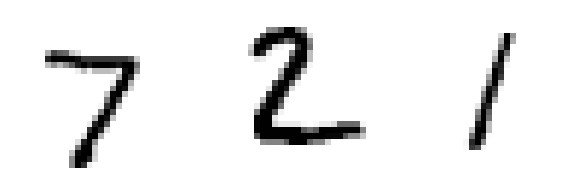

In [17]:
plt.figure(figsize=(7.2, 2.4))  # Gesamtgröße der Grafik in Zoll (breit genug für 3 Bilder nebeneinander)

for index, image in enumerate(X_new):  # Schleife über die 3 Testbilder
    plt.subplot(1, 3, index + 1)  # 1 Zeile, 3 Spalten – aktuelles Bild an Position index + 1
    plt.imshow(image, cmap="binary", interpolation="nearest")  # Zeigt das Bild in Schwarz-Weiss
    plt.axis('off')  # Entfernt die Achsenbeschriftungen

plt.subplots_adjust(wspace=0.2, hspace=0.5)  # Abstand zwischen den Bildern
plt.show()  # Zeigt die Bilder


### Experimental test

The final test consist in a "physical" test.
1) Draw on a piece of paper 1 single digit between 0 and 9.
2) Take a picture with your webcam of it
3) Test if the neural network can correctly identify also your handwriting


To do that you need to preprocess first your image and put it in the right format, by using the Keras function 'load_img'
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/load_img
ATTENTION: your image need to be resized in the same size that you used for training.... And pay attention to RGB images and grayscale!

In [20]:
img = tf.keras.preprocessing.image.load_img("my_digit.jpg", color_mode="grayscale", target_size=(28, 28))
# Lädt das Bild in Graustufen und skaliert es auf 28x28 Pixel (wie MNIST)

img_array = tf.keras.preprocessing.image.img_to_array(img)
# Wandelt das Bild in ein NumPy-Array um – Form: (28, 28, 1)

img_array = img_array / 255.0
# Skaliert die Pixelwerte auf den Bereich [0, 1]

img_array = tf.expand_dims(img_array, 0)
# Fügt eine Batch-Dimension hinzu → Form: (1, 28, 28, 1)


Now you can simply predict the class of your image, as done just before for the MNIST test images.


In [21]:
predictions = model(img_array, training=False)  # Modellvorhersage im Inferenzmodus (kein Dropout etc.)
score = tf.nn.softmax(predictions[0])  # Softmax anwenden auf die erste (und einzige) Vorhersage → ergibt Wahrscheinlichkeiten

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(np.argmax(predictions, axis=1), 100 * np.max(score))
)
print(score)  # Zeigt alle 10 Wahrscheinlichkeiten (für Klassen 0–9)


This image most likely belongs to [2] with a 23.19 percent confidence.
tf.Tensor(
[0.08534133 0.08534133 0.23189662 0.08534133 0.08534133 0.08534148
 0.08534178 0.08534186 0.08537154 0.08534133], shape=(10,), dtype=float32)


Is the result correct?

### Plot the evolution of accuracy and loss
The historical values of accuracy and loss during training and validation are stored during training in the variable "history".
You can access them through history.history.
Use this information to plot and compare the evolution of accuracy and loss for training and validation. What can you learn from this?

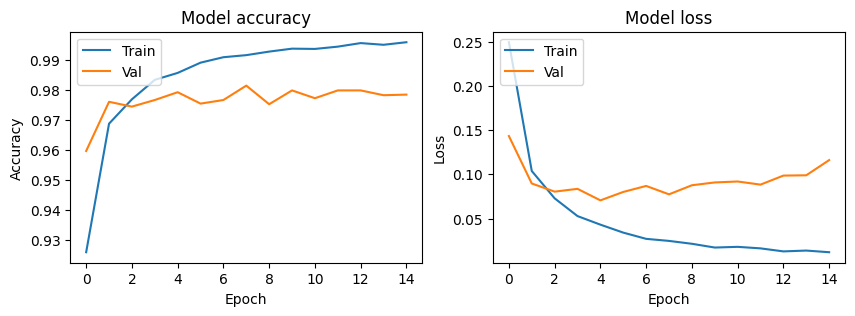

In [23]:
plt.figure(figsize=(10, 3))  # Setzt die Gesamtgröße der Darstellung auf 10x3 Zoll

# Teil 1: Genauigkeit (Accuracy) visualisieren
plt.subplot(121)  # Erstes Subplot (1 Zeile, 2 Spalten, erstes Feld)
plt.plot(history.history['accuracy'])  # Trainingsgenauigkeit pro Epoche
plt.plot(history.history['val_accuracy'])  # Validierungsgenauigkeit pro Epoche
plt.title('Model accuracy')  # Titel des Plots
plt.ylabel('Accuracy')  # Y-Achse beschriften
plt.xlabel('Epoch')  # X-Achse beschriften
plt.legend(['Train', 'Val'], loc='upper left')  # Legende oben links

# Teil 2: Verlust (Loss) visualisieren
plt.subplot(122)  # Zweites Subplot (zweites Feld)
plt.plot(history.history['loss'])  # Trainingsverlust pro Epoche
plt.plot(history.history['val_loss'])  # Validierungsverlust pro Epoche
plt.title('Model loss')  # Titel des Plots
plt.ylabel('Loss')  # Y-Achse beschriften
plt.xlabel('Epoch')  # X-Achse beschriften
plt.legend(['Train', 'Val'], loc='upper left')  # Legende oben links

plt.show()  # Zeigt beide Plots an
